In [73]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sum']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Mechanics Lab IIa -- Numerical Integration Applied to Projectile Motion

In this lab you will use a program to numerically integrate in order to solve a differential equation. Specifically, you'll be using your numerical integrator to solve the trajectory of a projectile. Before you learn about numerical integration, though, you'll need to learn a few new progaming tools: conditional statements, loops, and functions.

## Objectives
In this lab, you will 

* combine conditionals with logic statements to add decisions to programs;
* use loops to repeat actions;
* define your own functions;
* use simple Euler integration to find the trajectory of a projectile;
* and improve your simple Euler integration method by calculating the derivatives half-way between time-steps.
 

## New programming tools

### Logic and conditional statements

In order to write useful code, you will want to have your program behave differently in different situtations. To accomplish this, your program will 1) need to be able to evaluate whether certain conditions are satisfied and 2) evaluate different code depending on the whether they are or are not satisfied.

Logical and comparison operators test allow us to test whether variables satisfy certain conditions. Comparison between two or more variables can be made using the following symbols
* \>, < ("greater than" and "less than") 
* \>=, <= ("greater than or equal to" and "less than or equal to"
* ==, != ("equal to" or "not equal to") Note that a single equals sign assigns the value of the variable on the right to the variable on the left. Two equal signs are needed for a comparison.

Multiple conditions can be combined together using
* and (if both the operands are true then condition becomes true)
* or (if any of the two operands are true then condition becomes true) and 
* not (used to reverse the logical state of its operand, for instance, a true statement becomes false.)

Parentheses may be used to specify the order of operations.

In [74]:
# Examples of how to use conditional statements
##### DO THIS: before running this cell, predict the outcomes of each of the statements.

a = 5
b = 23
c = 42

print(a == b, a <=b) # Comparisons are used to test whether a equals b, also whether a is less than or equal to b
print(a < b and b < c) # Tests whether a is less than b and b is less than c
print((a < b) or (c < b)) # Tests whether either a or c is less than b
print((a < b) and not(b < c)) # Tests whether a is less than b and b is not less than c
print(not False, not 0, not True, not 1) # The number "zero" evaluates to false and the number "one" evaluates to true.
print(not (False and a < 20))

##### DO THIS: change the values of a, b, and c and then rerun this cell.

False True
True
True
False
True True False False
True


Once your program has evaluated whether a condition is true or false, it must make a decision to execute different code. This is done using *if* and *if ... else* statements, as shown below. In these statements, the condition (e.g. a == 10) is separated from the outcome by a colon and indentation is used to separate the code inside the if statement from the rest of the code.

if statement
> if expression:

> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  statement(s)

if ... else statement
> if expression:

> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  statement(s)

> else:

> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  statement(s)

In [75]:
# Examples of "if" and "if ... else" statements.
##### DO THIS: before running this cell, predict the outcomes of each of the statements.

a = 10

# If the outcome consists of only a single line of code, it may go on the same line as the if statement.    
if a == 10 : print("a equals 10") 

# If the outcome consists of multiple lines of code, it is separated from the rest of the code by indentation.
if a == 10 : 
    print("a equals 10") 
    print("hooray")

#Once the if statement is done, the left-justification of the code returns to as it was before.
name1 = "Alice"

#"if ... else" statements allow the programmer to specify an outcome if the condition is not met.
if name1 == "Carlos" : print("name1 is Carlos") 
else : 
    print("name1 is not Carlos.")
    print("Who is it?")
    
# "elif" can be used to check multiple conditions. 
if name1 == "Carlos" : print("name1 is Carlos") 
elif name1 == "Alice" : print("name1 is Alice") 
else : 
    print("name1 is not Carlos or Alice.")
    print("Who is it?")
#Note that if the if statement evaluates to "true" the "elif" statement will not be evaluated.
    
#Multiple if and if...else statements may be nested together to create more complex conditionals.
name2 = "Bob"
if name1 == "Alice" :
    if name2 == "Bob" : print("Alice and Bob are both here.")
    else : print("Alice is here but where is Bob?")
else : print("We are missing Alice.")
    
##### DO THIS: change the values of a, name1, and name2 and reevaluate this cell.

a equals 10
a equals 10
hooray
name1 is not Carlos.
Who is it?
name1 is Alice
Alice and Bob are both here.


#### Exercise 2.1

In the cell below, use nested if else statements to write code that will compare three variables, a, b and c, and produce the following outcomes: 
* print "a is False" if a equals 0; 
* print "a is the greatest" if a is not equal to zero and a is greater than b and c; 
* and print "a is less than or equal to b or c" and print the values of each of the variables if a is less than or equal to either b or c. 

Set a, b and c equal to different values to test that your code produces the expected results.

In [76]:
# Exercise 2.1
a = 7
b = 78
c = 20

##### Your code here

if a == 0: 
    print('a is False')
elif a != 0 and a > b and a > c: 
    print('a is the greatest')
elif a <= b or a <= c: 
    print('a is less than or equal to b or c')
    print('a = {}, b = {}, c = {}.'.format(a,b,c))

a is less than or equal to b or c
a = 7, b = 78, c = 20.


### Loops

In other situations, you will want your program to complete the same actions multiple times. Loops are the way to accomplish this sort of task.

*For loops* enable you to iterate through each item in an array (or list or string). The syntax looks like

> for iterating_var in sequence:

> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; statement(s)

As with if statements, the colon separates the statement(s) from the condition and indentation is used to separate the code inside the loop from that outside of it. An example is below.

In [77]:
# Example for loop
##### DO THIS: before running this cell, predict the outcome.

iterator = arange(0, 6, 1) #create an array from zero to five (inclusive) in steps of 1.

for i in iterator:
    print(i**2) #print the squared value of each element in the array


0
1
4
9
16
25


Sometimes you will want to stop iterating (i.e., break out of the loop) before you have gone through each item in the array. A "break" statement inserted into the loop (typically used with an if statement) will do this for you, as shown below.


In [78]:
# Example for loop with a break
##### DO THIS: before running this cell, predict the outcome.

iterator = arange(0, 6, 1) #create an array from zero to five (inclusive) in steps of 1.

for i in iterator:
    if i**2 > 10 : break #if i squared is greater than 10, break out of the loop
    print(i**2) #print the squared value of each element in the array



0
1
4
9


There is much more that could be said about loops. For example, in addition to for loops, python also supports *while loops* (loops which are iterated until a condition is met instead of through an entire array). Loops can also be nested inside each other (similarly to if statements) to allow one to iterate through multiple variables at once. You are encouraged to research both of those ideas as they come up in lab, but for now you know enough to get started.

#### Exercise 2.2

Write a loop that will iterate through an array, outputting for each element in the array the sum of it and all previous elements. Break out of the loop if your sum ever exceeds 50. Test your loop on an array that goes from 0 to 20 in steps of two. You should find that it stops iterating when it reaches 56. 

*Hint*: consider defining a variable that will be updated inside of the loop.

In [79]:
# Exercise 2.2
#### Your code here

sum = 0
array1 = arange(0, 21, 2)

for i in array1:
    sum += i
    if sum > 50: break

print(sum)

56


### Functions

In other situations, you may want to repeat the same operations in different contexts. Defining your own functions allow you to do this without writing the same code over again. In programming, repetitive code is bad -- not only does repetition clutter your code, making it harder to read, repetition also makes your code harder to debug and harder to update. 

Python comes with a huge number of built-in functions, many of which you are already using (e.g. print(), arange(), linspace(), and len()). Each of these functions preforms some action and may return a value. For example, len() returns the length of the array. Functions frequently take parameters or arguments, which are listed inside the parentheses. For example, len() takes an array as its argument. Therefore, when I write

> x = len(array)

I am calling the function len() with the argument of *array*. The len() function does some magic to determine the number of elements in *array* and returns that value, which *x* is then set to. When you define your own functions, you will call them the same way.

#### Defining a function

Many times, python will not have a built-in function that accomplishes what you want so you will have to define your own function. To define a function, you must follow a specific form:

* The function block begins with the keyword *def* followed by the function name and then a pair of parentheses. 

* Any input parameters or arguments are listed inside the parentheses. If the function does not take any parameters or arguments, the parentheses are left empty.

* A colon separates the function header from the code block and the entire code block is indented.

* The statement *return [expression]* exits a function, optionally passing back an expression to the caller. A return statement with no arguments is the same as returning nothing.

As a result, your function will look like

> def function_name ( parameters ) : 

> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; statement(s)

> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; return [expression]

and will be called like

> function_name(parameters)

In [80]:
# Example of a simple user-defined functions

def say_hello( name ): # Define the function "say_hello" that takes one argument, "name".
    print("Hello ", name) 
    return # End the function and return nothing

say_hello("Dave")

say_hello("Austin")

say_hello("Leo")

#### DO THIS: add a line of code to call the say_hello function with your name


Hello  Dave
Hello  Austin
Hello  Leo


In [81]:
# Example of a slightly more complex function

def find_distance( point1, point2 ): 
#Define a function to determine the distance between two points (which may have any number of dimensions).
    # If point1 and point2 are both integers, the distance between them is just the absolute value of their difference
    if (type(point1) == int and type(point2) == int) : 
        return abs(point1 - point2)
    
    # If the function is called with two arrays that do not have the same number of elements, 
    # print an error and exit gracefully
    if len(point1) != len(point2) : 
        print("The two points do not have the same dimension")
        return 0 # End the function early and return zero
    
    # If point1 and point2 are arrays of the same length, iterate through each element
    dist = 0
    for index in arange(0,len(point1),1): #calling a for loop in this way will iterate through each index in the array
        dist = dist + (point1[index] - point2[index])**2
    dist = sqrt(dist)
    return dist

p1 = [1,2]
p2 = [2,7]
print(find_distance(p1,p2))

p1 = 3
p2 = -5
print(find_distance(p1,p2))

print(find_distance([2,3,4],[2,4]))

#### Test this function by calling it with different arguments. 
# See if you can come up with arguments which will result in each of the three different return statements.

5.0990195135927845
8
The two points do not have the same dimension
0


#### Exercise 2.3

Write a function that will solve a 1-D constant-acceleration, kinematic problem. Your function should take an initial position, an initial velocity, an acceleration, and a time and return the position after that time. Test your function by running it with a variety of different parameters, including x0 = 2, v0 = 1, accel = -10, and t = 3 (which should produce -40).


In [82]:
# Exercise 2.3
#### Your code here

def distance(inix, iniv, acc, time):
    fir = acc * time**2 /2
    sec = iniv * time
    return inix + fir + sec

print(distance(2,1,-10, 3))

-40.0


One of the beautiful things about functions is that they are their own little environments. This means that any variable defined inside the function will not be available outside of the function. Such variable are considered *local variables* in contrast to *global variables*, which are defined outside of functions and available everywhere. Where a given variable is available is referred to as the *scope* of the variable. An example is below.

In [83]:
# Example of local vs global variables
##### DO THIS: before running this cell, predict the outcome.

# Defining two "global" variables. These two variables will be available everywhere
globalvar_a = 1
var_b = 2

#This function will print the values of two variables
def scope_function1():
    var_b = 3
    localvar_c = 4
    print("I'm inside the function! globalvar_a equals ", globalvar_a) 
    # Since globalvar_a is defined outside of a funtion, it is available everywhere
    print("var_b equals ", var_b)
    print("localvar_c equals ",localvar_c)
    return

scope_function1()
print("I'm outside the function! globalvar_a equals ", globalvar_a)
print("var_b equals ", var_b) 
# Even though var_b was modified inside the function, var_b outside the function is unchanged
# What happened is that the line "var_b = 3" actually defined a local copy of the variable inside of the function, rather than
# altering the global variable var_b.

#### DO THIS: uncomment the following line
print("localvar_c equals ",localvar_c)
# Since lovalvar_c was only defined inside the function, it is not available outside of it.

I'm inside the function! globalvar_a equals  1
var_b equals  3
localvar_c equals  4
I'm outside the function! globalvar_a equals  1
var_b equals  2


NameError: name 'localvar_c' is not defined

As you can see, keeping track of the scope of variables can get confusing. To keep things clean, it is smart to never modify in a function any variable that was defined outside of the function, *unless* it was passed as a parameter.

#### Exercise 2.4
For this exercise, you will practice putting together the skills you have learned by writing code to approximate the function ln(1 + x) as a series. As you may have discovered in lab 1, by using Taylor series we can show that

$$ ln(1+x) = x - \frac{x^2}{2} + \frac{x^3}{3} - \frac{x^4}{4} + \frac{x^5}{5} - . . . $$

On a piece of paper, verify that the above equation is true.

Your goal is to write code that will determine how many elements of the series are needed to approximate ln(1+x) to a certain level of precision, given a value of x. To do this

* define a function that will return the nth element of the series, given the parameters x and n;
* write a for loop that will calculate the sum by calling your user-defined function, breaking when the sum of the series is within some $\epsilon$ of the actual value of ln(1+x);
* and use your loop to determine how many elements of the series were needed to achieve the desired level of precision.

Please test your code with a variety of different values for $x$ and $\epsilon$, including $x = 0.8$ and $\epsilon = 0.001$ (which should result in 16).

*Hint 1:* the smartest way to write code is to build it from smaller pieces. In this case, I suggest writing and testing your function before using it in the loop. 

*Hint 2:* printing off different variables inside your loop may help you determine if your code is working correctly.

*Hint 3:* you'll have to look up the python function for natural log.

In [ ]:
# Exercise 2.4
#### Your code here

def nth(x, n):
    return (-1)**(n+1) * x**n / n
sum = 0
n = 1
x = 0.8
epi = 0.001
while abs(sum - math.log(1+x))> epi:
    sum += nth(x, n)
    print(n)
    n += 1
        
print(sum)
    

## Simple Euler integration of projectile motion

Now that you have practiced writing conditional statements, loops, and functions, the rest of the lab will be spent learning how to use Euler integration, a method for numerically integrating to solve a differential equation.
    
The main idea of Euler integration is to use Taylor series approximations to cyclically update the position of a projectile by 

        1)applying a constant accleration for a small time interval to determine a new velocity  
        
        2)applying the new velocity for a small time interval to get the new position  
        
        3)Rinse and repeat 1) and 2)
        
Incidentally, this code will take a similar form to the code you wrote in exercise 2.4.
        
Note:  we will be using only 1st-order Taylor approximations here.

We need to store x, vx, y, and vy at each point in time.  Rather than hold them as individual 1-dimensional arrays, let's use the following convention:  

    r[0] will be the x position
    r[1] will be the vx velocity
    r[2] will be the y position
    r[3] will be the vy velocity

So this r vector contains four elements for each time step.  We'll create solutions on a vector of time points that we'll call tpts.
Note that the complete solution will be found by pairing a time vector "tpts" with the solution vector r.

### Using simple Euler integration

The following cells will use 1st order Euler integration to find the trajectory of a projectile without drag force. You'll examine and run each of them in turn.

#### Exercise 2.5

The following cell will set the initial conditions and parameters for the system. Please edit it to set the following variables: $g = 9.8$ m s$^{-2}$, $m = 1$ kg, $t_{start} = 0.0$ s, $t_{end} = 15.0$ s, and the number of time steps to 3000. Then edit it to define the initial conditions such that the projectile starts from (0,0) with velocity = (20,20).

In [86]:
# Exercise 2.5
# No damping, numerical integration, projectile motion over level ground: defining variables.

# Here we define the variables that will be used throughout the integration
g = 9.8 #the acceleration due to gravity.  By declaring it here it will be available anywhere in the rest of the notebook
m = 1 # the mass of the projectile

# Create 
tstart = 0 #starting time
tend = 15 #ending time
N = 3000 # #steps
h = (tend-tstart)/N #  h is the time step, deltat
tpts = arange(tstart,tend,h) # an array of evenly spaced time points at which to create solutions

# Initialize x and v.  For a complete solution to the differential equations we need to specify the starting
#values of x, vx, y and vy
x0 = 0 #initial x position
y0 = 0 #initial y position
vx0 = 20 #initial x-component of the velocity
vy0 = 20 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float) #this array contains the initial values of x, vx, y, vy, in order
# Note that the list 0,20,0,20 is enclosed in square brackets

# print('h:', h, 'tpts:', tpts)

##### DO THIS: add a line of code to print the variable h and the array tpts so that you can see what they contain.
# After you have done so, remove the line of code and recompile the cell so that you don't clutter up the output.

In a 1st-order Euler integrator, the time derivative is used to propagate the motion forward by assuming $x(t + \delta_t) \approx x(t) + \delta_t \frac{dx(t)}{dt}$. The following cell defines a function to return the time derivative of all the variables. 

#### Exercise 2.6

In order to examine how the derivative function works, add the following line to the end of the cell before you run it:

    print(deriv(rinit,0))

This line will call the derivative function for $t = 0$ and print the derivatives of $x$, $y$, $v_x$, and $v_y$. Convince yourself that the values printed are correct.

In [92]:
# No damping, numerical integration, projectile motion over level ground: derivatives.

# We need to define a function that returns the time derivatives of all the variables.

#The syntax for this defined function is to use the reserved word *def*, then name the function.  In parentheses
#go the variables (which are typically vectors and scalars).  Following the variables we put a colon.  The colon
#tells the Python interpreter that the indented block that follows all falls under the scope of the defined
#function.  Finally, the reserved word *return* tells us the output of the function.  In this case we have a new
#set of r values, which are packaged as a 4-element list (x,vx,y,vy), using the numpy.array() function.  Recall 
#that the magic %pylab preloads numpy, so we don't actually have to write it as numpy.array(), but simply array()

def deriv(r,t):
    x = r[0]  #first, extract the variables from the r-list
    vx = r[1]
    y = r[2]
    vy = r[3]
    dxdt = vx #now create the derivatives.  Note:  by definition dxdt = vx
    dvxdt = 0
    dydt = vy
    dvydt = - g
    return array([dxdt, dvxdt, dydt, dvydt],float) #we need to specify the output of this function

# Exercise 2.6
#### Add the line of code to call the deriv function here.
print(deriv(rinit,0))


[20.   0.  20.  -9.8]


In order to continue propagating the trajectory forward in time, we'll need to loop through our entire array of times (tpts from two code cells ago). Each time we do so, we'll calculate the derivatives of position and velocity at the previous step and use them to find the new values of position and velocity. In order to keep track of all of the positions and velocities, we'll store them in a list to which we append each new value as it is calculated.

In [93]:
#Now we can accumulate *lists* that hold the solutions.   We let each list accumulate in order to create x(t), vx{t},
#y(t), vy(t)
#Create the empty lists
xpts = []  #this is an empty list that will hold x solutions
vxpts = []  #this will hold vx solutions
ypts = []  #y
vypts = [] #vy

r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values

#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
for t in tpts:  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    
    r += h*deriv(r,t) #update all 4 r vector elements by using a 1st order Taylor series expansion
                            #in time, advanced by one time step h.
            #In words:  a new 4-element r vector is created that takes the previous r vector and adds
            #a piece that is the 1st-order Taylor approximation, using the derivatives from the deriv function
            #applied to each one of the elements.  r += is shorthand for r = r +, i.e. use the old value of r
            #to update the newest value of r.
        
        
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
        tmax = t               # by noting when the projectile hits the ground
      
        trange = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop
print(tmax, trange)
        

4.085 81.79999999999963


Now that we have completed the Euler integration, it is time to examine the the results. The following two blocks of code output interesting values and plot the trajectory.


Projectile motion without air drag, over level ground:
Initial speed = 28.28 m/s
Launch angle = 45.00 degrees
Time in air =  4.08 seconds
Range = 81.79999999999963


Text(0, 0.5, 'height (m)')

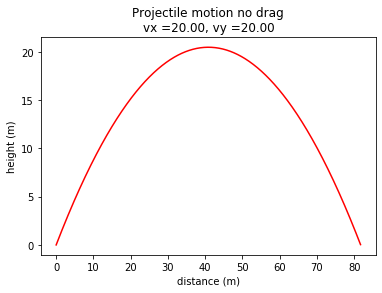

In [94]:
print("\nProjectile motion without air drag, over level ground:")
print("Initial speed = {:5.2f} m/s".format(sqrt(rinit[1]**2+rinit[3]**2)))
print("Launch angle = {:5.2f} degrees".format(180*arctan(rinit[3]/rinit[1])/pi))
print("Time in air = {:5.2f} seconds".format(tmax))
print("Range =", trange) #print the range
plot(xpts, ypts, '-r')  #plot the two lists (x,y) to show the trajectory of the projectile
                #matplotlib allows you plot lists or vectors, so long as they have the same length   
    
title("Projectile motion no drag\nvx ={:3.2f}, vy ={:3.2f}".format(rinit[1],rinit[3]))
                # \n indicates "new line"
                # \t is "tab"
                # \r is "carriage return"
                
xlabel("distance (m)")
ylabel("height (m)")

That's all very well, but lists are inconvenient for scientific plotting, where you might want to adjust the scale or do some other manipulation (see below, where you need to compare your analytical to numerical solutions). The following block of code converts the lists to arrays and, again, plots the result.

Text(0, 0.5, 'height (m)')

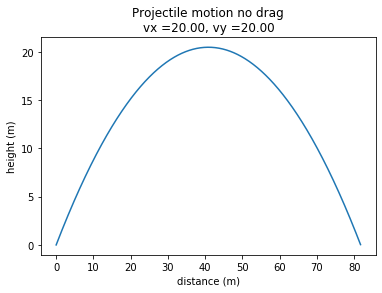

In [95]:
 # Convert all the lists to arrays like so:
t_array = array(tpts,float)
rx = array(xpts,float)
ry = array(ypts,float)
figure()  #this just gets us a new figure, otherwise we'll keep plotting atop the previous one
plot(rx,ry)  #No surprises here--it should look identical to the previous figure (except perhaps the line color)
title("Projectile motion no drag\nvx ={:3.2f}, vy ={:3.2f}".format(rinit[1],rinit[3]))            
xlabel("distance (m)")
ylabel("height (m)")

### Accuracy of simple Euler integration

Congratulations, you've now just walked through your first numerical integration. The next step is to examine its accuracy, something we can do easily by comparing the numerically-calculated trajectory to the analytic solution.

#### Exercise 2.7

For comparison, set up the analytical (exact) solution evaluated at the same time points and plot it over the numerical solution, along with a vector representing the difference between the y-values of the two solutions (called the residuals).

*Hint:* You'll want to make sure that your numerical and analytical solutions have the same number of points, so that the y values of the numerical solution and the residuals can be plotted against the x values of the numerical solution. Remember that len() is the function that will return the length of an array.


0.10008250000002156

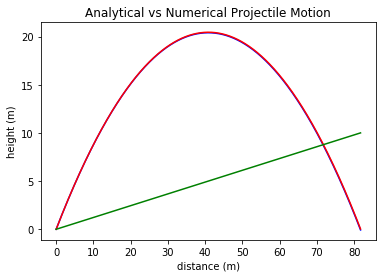

In [96]:
# Exercise 2.7, projectile motion, no damping
# Plot analytical trajectory in blue, numerical trajectory in red.  Then create a vector 

# residual = ypts - yanalytical 

# that represents the difference between these two y-values as a function of x, and plot 100* this difference vs x
# in green.

yanalytical = []
for i in rx:
    num =20*i/20-9.8*i**2/(2*20**2)
    yanalytical.append(num)
    
figure()  #this just gets us a new figure, otherwise we'll keep plotting atop the previous one
plot(rx,yanalytical, color='blue') #No surprises here--it should look identical to the previous figure (except perhaps the line color)
plot(rx,ry, color='red')

residual = ypts - array(yanalytical) 
residual *= 100

plot(rx,residual, color='green')


title("Analytical vs Numerical Projectile Motion")            
xlabel("distance (m)")
ylabel("height (m)")

error = residual[len(residual)-1]/100
error

#### Exercise 2.8

You may note that there is a small linear error term that arises because of when and where we evaluate the derivatives. How big was the error term by the end of the calculation (when the projectile returned to y = 0)?

##### Accumulated error = 0.10008250000002156


## Improving the Simple Euler Integration method

We can reduce the amount of error introduced by using the simple Euler integration method if we choose a smarter place to evaluate our derivatives. The following blocks of code show how evaluating the derivatives *halfway in-between* the time steps greatly improves the accuracy.

Consider the following simple quadratic function (incidentally, the solution to a 1-D constant acceration problem in which a = -1 and the projectile starts from y = 1 with v = 1.5).

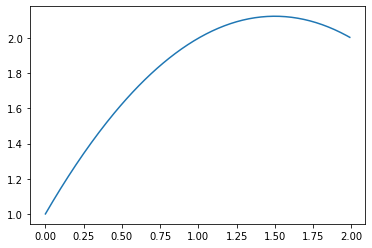

In [67]:
tpts = arange(0,2,0.01)
y0 = 1.0
v0 = 1.5
a = -1.0
y = y0 + v0*tpts + 0.5*a*tpts*tpts
plot(tpts,y)

Now imagine trying to approximate that trajectory by using the local slope at t = 1.0 to take a single coarse step between t = 0 and t = 0.5. That's what what a simple Euler approximation with a stepsize of $\delta_t$ = 0.5 would do, as demonstrated by the following block of code.

Simple Euler error:   0.125
[1.0, 1.75]


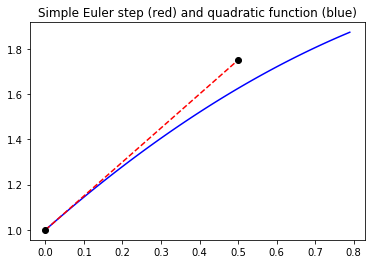

In [70]:
figure()
tpts = arange(0,0.80,0.01)  #set up the analytical solution for 1-dimensional constant acceleration problem
y0 = 1.0
v0 = 1.5
a = -1.0
y = y0 + v0*tpts + 0.5*a*tpts*tpts
xrange=(0,0.5)
yrange=(0,2)
plot(tpts,y,'-b',)  #plot in blue, solid line

#Now the usual numerical solution:
h = 0.5  #the step size
rinit = array([y0,v0],float) #this array contains the initial values of y, vy, in order

def deriv(r,t):
    y = r[0]
    vy = r[1]
    dydt = vy
    dvydt =  a
    return array([dydt, dvydt],float)

ypts = []  #y
vypts = [] #vy
r = rinit.copy()  #make a *copy* of rinit.  This leaves init unchanged, but allows r to take on different values
ypts.append(r[0])
vypts.append(r[1])

newtpts = (0, h) #we'll only look at 1 time step so there will be no for loop, and this solution will
                 #be very coarsely plotted.
r += h*deriv(r,t)  #this is y1 =(deltat)*(v0) + y0 and vy1= (deltat)*a
ypts.append(r[0])
vypts.append(r[1])

plot(newtpts,ypts,'--r')  #plot extrapolated position to get y1 at t = h = 0.5 s
title("Simple Euler step (red) and quadratic function (blue)")
yanalytical = y0 + v0*h + 0.5*a*h*h
plot(newtpts,ypts,'ko')
print("Simple Euler error:  ",r[0]-yanalytical ) #remember that r[0] contains the latest value of y


### Where might be a better place to evaluate the derivative?  
The black dot at the end of the red dashed line represents the result of taking a whole step of h = 0.5, using the
slope that was evaluated back at the origin.  The error in y (0.125) is the vertical distance between the black dot and the analytical solution at time h = 0.5.

Let's take a half step (h/2 = 0.25 s).  Evaluate the derivatives there, and use those to correct the slopes for making the whole step.  You might recall the mean-value theorem from calculus, where the slope of the function matches the secant line somewhere in between its end points.  For quadratic functions, we'll see that this is exactly the right
place for us to evaluate the derivatives.

Half-step Euler error:  0.00000000000000e+00
The solid red line is the trajectory of the step
The black dot is the actual step that is taken over t = 0.5 s


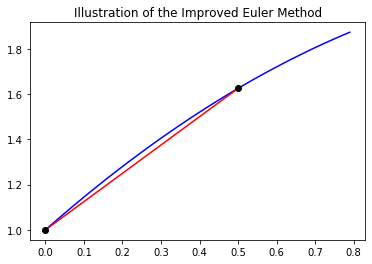

In [71]:
#The code below implements this Improved Euler, or Euler Half-Step Method

figure()
tpts = arange(0,0.80,0.01)  #set up the analytical solution for 1-dimensional constant acceleration problem
y0 = 1.0
v0 = 1.5
a = -1.0
y = y0 + v0*tpts + 0.5*a*tpts*tpts
xrange=(0,0.5)
yrange=(0,2)
plot(tpts,y, '-b')

#Now the new numerical solution:
h = 0.5  #the step size
rinit = array([y0,v0],float) #this array contains the initial values of y, vy, in order
#k1=0 #This is a new variable 

def deriv(r,t): #Notice that the deriv function is the same as use used above for simple Euler
    y = r[0]
    vy = r[1]
    dydt = vy
    dvydt =  a
    return array([dydt, dvydt],float)

ypts = []  #y
vypts = [] #vy
r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values
ypts.append(r[0])
vypts.append(r[1])

newtpts = array([0, h],float)
k1= (h/2)*deriv(r,t) #evaluate the increment on the half step, i.e. the midpoint function at the half step.
r += h*deriv(r+k1,t) #this is the whole step after sniffing out the derivatives at the midpoint
ypts.append(r[0])
vypts.append(r[1])

plot(newtpts,ypts,'-r')  #plot extrapolated position to get y1 at t = h = 0.5 s
plot(newtpts,ypts,'ko')

title("Illustration of the Improved Euler Method")
print("Half-step Euler error:  {:15.14e}".format(r[0]-yanalytical) )
print("The solid red line is the trajectory of the step")
print("The black dot is the actual step that is taken over t = 0.5 s")

So now we know that there is a better time step at which to evaluate the derivatives before making the full step.  By
*substituting* these lines inside your integration loop we make the Euler Half Step, or Improved Euler method: 

    k1= (h/2)*deriv(r,t) # evaluate the increment on the half step, i.e. the midpoint function at the half step.
    r += h*deriv(r+k1,t) # this is the whole step after sniffing out the derivatives at the midpoint

#### Exercise 2.9

Modify the simple Euler projectile motion integration from earlier in this notebook to use this Improved Euler method. To do this, you'll want to copy the relevent blocks of code from above into the cell below. You may use as few or as many code cells as you like. *Hint: I suggest making sure your copied code produces results for simple Euler integration before modifying it for improved Euler.*

As before, compare your result with the analytical solution when the projectile hits the ground.  What's the error now?  If you've done everything correctly, you'll find that the error array will need to be multiplied by a *big* number to display in a useful fashion on the same plot as the trajectory.

##### Accumulated Error (Improved Euler) =4.035660694512444e-14


4.08 81.69999999999963
817 817 817


4.035660694512444e-14

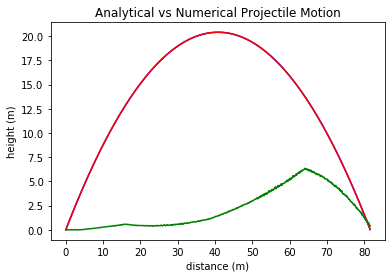

In [124]:
# Exercise 2.9 Projectile motion, improved Euler
# No damping, numerical integration 

xpts = []  #this is an empty list that will hold x solutions
vxpts = []  #this will hold vx solutions
ypts = []  #y
vypts = [] #vy



r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values

#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
for t in tpts:  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    
    
    k1= (h/2)*deriv(r,t) # evaluate the increment on the half step, i.e. the midpoint function at the half step.
    r += h*deriv(r+k1,t) # this is the whole step after sniffing out the derivatives at the midpoint
    
        
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
        tmax = t               # by noting when the projectile hits the ground
      
        trange = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop
print(tmax, trange)

yanalytical = []
for i in xpts:
    num =20*i/20-9.8*i**2/(2*20**2)
    yanalytical.append(num)
    
figure()  #this just gets us a new figure, otherwise we'll keep plotting atop the previous one
plot(xpts,yanalytical, color='blue') #No surprises here--it should look identical to the previous figure (except perhaps the line color)
plot(xpts,ypts, color='red')


print(len(xpts), len(ypts), len(yanalytical))
residual = ypts - array(yanalytical) 
gresidual = residual * 1e13

plot(xpts,gresidual, color='green')


title("Analytical vs Numerical Projectile Motion")            
xlabel("distance (m)")
ylabel("height (m)")

error = residual[-1]
error
        

## Check-out
#### Exercise 2.10

Briefly summarize in the cell below the ideas of today's lab.
---
At the beginning of this lab, we worked through simple boolean logic statements to obtain various outcomes,
with the goal of becoming more comfortable with such logic. In the next portion, we were introduced to the 
methods by which one defines a function and the associated syntax. In conjunction with this, we become 
acquainted with looping statements to obtain bounded iterations on our desired actions. Such was accomplished
through for loops, and a while loop which we incorporated with outside knowledge. Finally, we applied the 
previous concepts to a simple kinematics, combining them to perform Euler integration to calculate trajectory,
and experimenting with two different time-step approximations: 1) initial point, and 2) midpoint.

## Challenge Problems

There are no challenge problems today. However, you are welcome to start on lab 2, part b. That lab will apply the same code you have developed today to the case of projectile motion with drag.